In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
vpn = pd.read_csv('vpn.csv')
vpn.head()

,user_country,location_selected,protocol,date,time_to_connect,download_speed,latency
0,GB,UK - London,udp,2018-02-06,15.0,58942.0,88.0
1,FR,France - Paris - 1,udp,2018-02-06,61.0,11878.0,528.0
2,GB,UK - London,udp,2018-02-06,52.0,18254.0,322.0
3,GB,UK - London,udp,2018-02-06,21.0,93798.0,38.0
4,GB,UK - London,tcp,2018-02-06,100.0,12048.0,460.0


In [47]:
vpn.isnull().any()

user_country         False
location_selected    False
protocol              True
date                 False
time_to_connect       True
download_speed        True
latency               True
dtype: bool

In [49]:
protocol_null = vpn[vpn.protocol.isnull()]
ttc_null = vpn[vpn.time_to_connect.isnull()]
ds_null = vpn[vpn.download_speed.isnull()]
latency_null = vpn[vpn.latency.isnull()]

protocol_null.shape, ttc_null.shape, ds_null.shape, latency_null.shape, vpn.shape
# the ratios of null value rows are small, so I decided to delete the null columns

((22, 7), (99, 7), (107, 7), (14793, 7), (65534, 7))

In [50]:
vpn = vpn.dropna()
vpn.isnull().any()

user_country         False
location_selected    False
protocol             False
date                 False
time_to_connect      False
download_speed       False
latency              False
dtype: bool

In [51]:
vpn.describe()

,time_to_connect,download_speed,latency
count,50733.000000,50733.000000,50733.000000
mean,87.906530,49797.119800,345.761083
std,472.678189,38675.385063,5493.033735
min,0.000000,0.000000,0.000000
25%,22.000000,20857.482200,60.000000
50%,34.000000,41311.157600,102.000000
75%,58.000000,67820.786000,199.000000
max,58817.000000,372800.317800,978256.000000


In [52]:
vpn.groupby('location_selected').nunique()

,user_country,location_selected,protocol,date,time_to_connect,download_speed,latency
location_selected,,,,,,,
France - Paris - 1,3,1,7,15,819,18824,1803
Germany - Nuremberg,3,1,7,14,395,4533,586
UK - London,3,1,7,14,819,23545,1656


In [53]:
vpn.dtypes

user_country          object
location_selected     object
protocol              object
date                  object
time_to_connect      float64
download_speed       float64
latency              float64
dtype: object

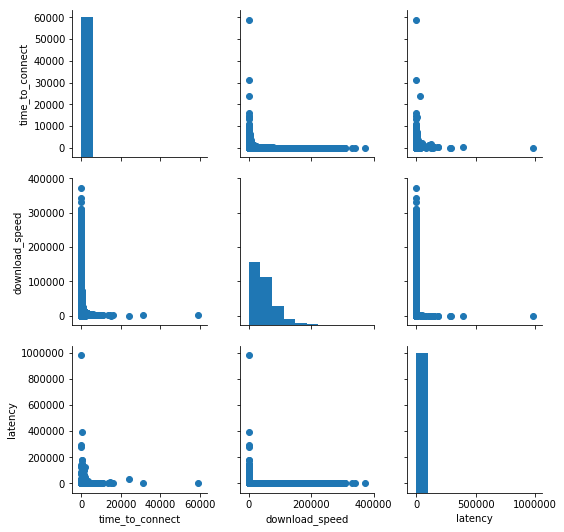

In [11]:
g = sns.PairGrid(vpn)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
# no correlation

In [12]:
table = vpn[['time_to_connect', 'download_speed', 'latency']]
table.head()

,time_to_connect,download_speed,latency
0,15.0,58942.0,88.0
1,61.0,11878.0,528.0
2,52.0,18254.0,322.0
3,21.0,93798.0,38.0
4,100.0,12048.0,460.0


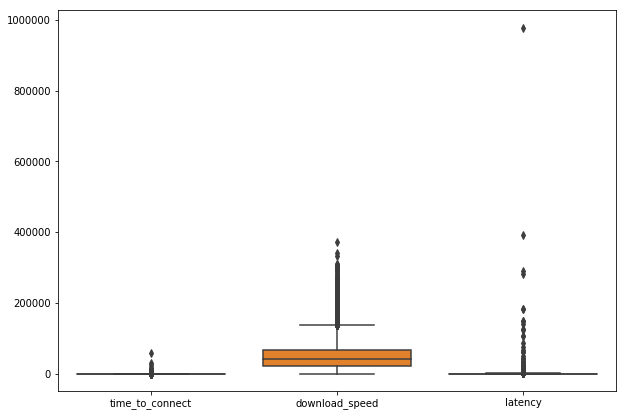

In [13]:
plt.figure(figsize=(10,7))
sns.boxplot(data=table)

In [14]:
vpn.date = pd.to_datetime(vpn.date)

In [15]:
min(vpn.date), max(vpn.date)
# 2-week duration

(Timestamp('2018-02-06 00:00:00'), Timestamp('2018-02-20 00:00:00'))

Text(0.5, 0, 'latency')

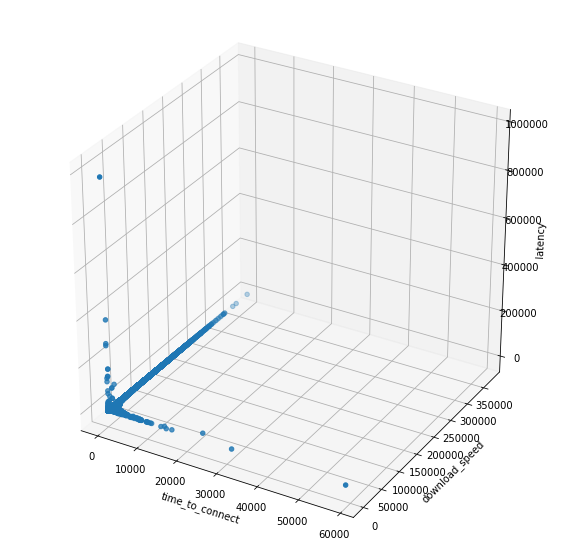

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(vpn.time_to_connect, vpn.download_speed, vpn.latency)
ax.set_xlabel('time_to_connect')
ax.set_ylabel('download_speed')
ax.set_zlabel('latency')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


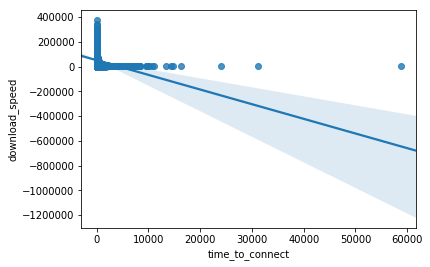

In [17]:
sns.regplot(data=vpn, x='time_to_connect', y='download_speed')

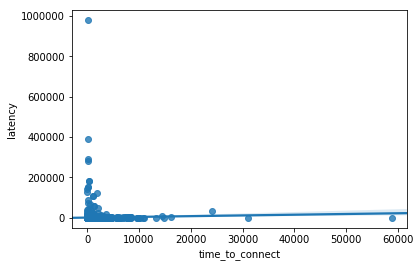

In [18]:
sns.regplot(data=vpn, x='time_to_connect', y='latency')

In [19]:
vpn1 = vpn[['location_selected', 'time_to_connect', 'download_speed', 'latency']]
vpn1.head()

,location_selected,time_to_connect,download_speed,latency
0,UK - London,15.0,58942.0,88.0
1,France - Paris - 1,61.0,11878.0,528.0
2,UK - London,52.0,18254.0,322.0
3,UK - London,21.0,93798.0,38.0
4,UK - London,100.0,12048.0,460.0


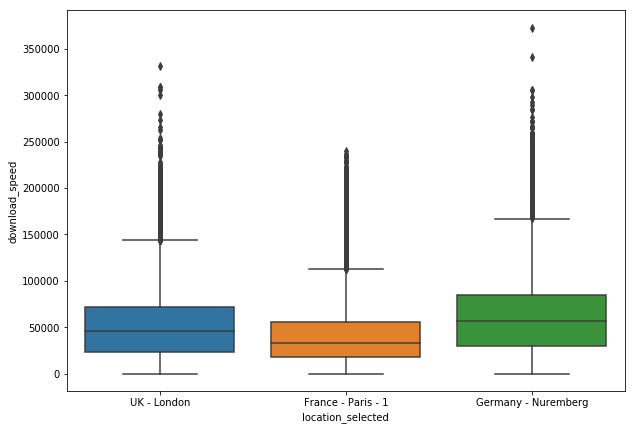

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(data=vpn1, x='location_selected', y='download_speed')

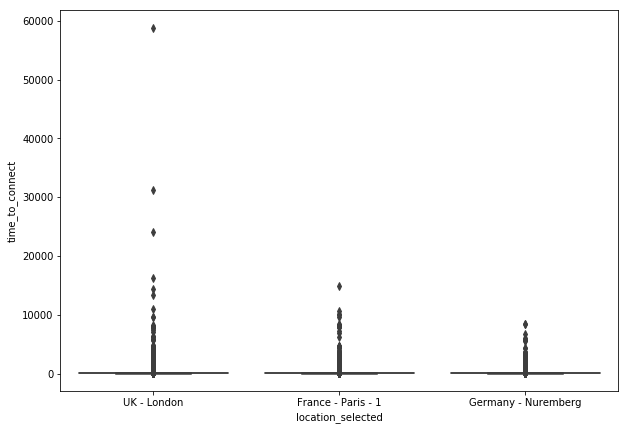

In [21]:
plt.figure(figsize=(10,7))
sns.boxplot(data=vpn1, x='location_selected', y='time_to_connect')

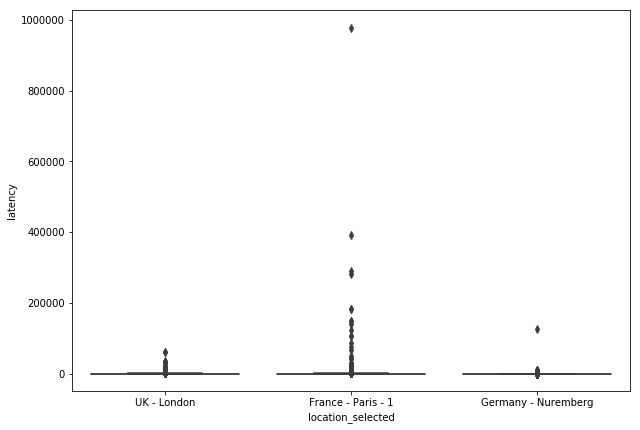

In [22]:
plt.figure(figsize=(10,7))
sns.boxplot(data=vpn1, x='location_selected', y='latency')

In [23]:
vpn['day_of_week'] = vpn.date.dt.dayofweek
vpn.head()
# Return the day of the week. It is assumed the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6. 

,user_country,location_selected,protocol,date,time_to_connect,download_speed,latency,day_of_week
0,GB,UK - London,udp,2018-02-06,15.0,58942.0,88.0,1
1,FR,France - Paris - 1,udp,2018-02-06,61.0,11878.0,528.0,1
2,GB,UK - London,udp,2018-02-06,52.0,18254.0,322.0,1
3,GB,UK - London,udp,2018-02-06,21.0,93798.0,38.0,1
4,GB,UK - London,tcp,2018-02-06,100.0,12048.0,460.0,1


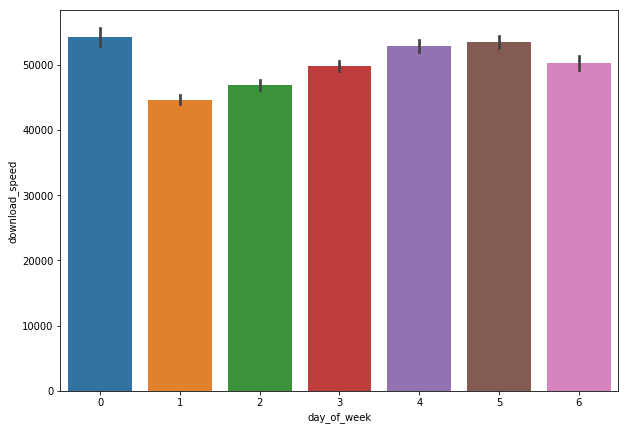

In [24]:
plt.figure(figsize=(10,7))
sns.barplot(data=vpn, x='day_of_week', y='download_speed')

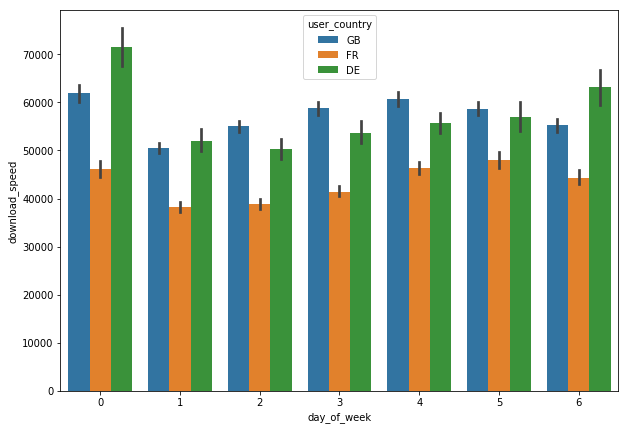

In [25]:
plt.figure(figsize=(10,7))
sns.barplot(data=vpn, x='day_of_week', y='download_speed', hue='user_country')

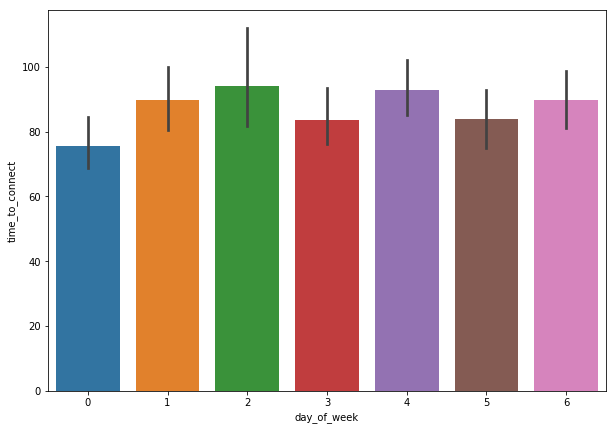

In [26]:
plt.figure(figsize=(10,7))
sns.barplot(data=vpn, x='day_of_week', y='time_to_connect')

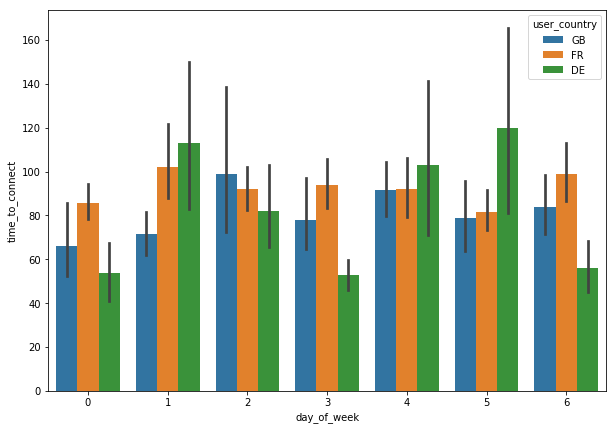

In [27]:
plt.figure(figsize=(10,7))
sns.barplot(data=vpn, x='day_of_week', y='time_to_connect', hue='user_country')

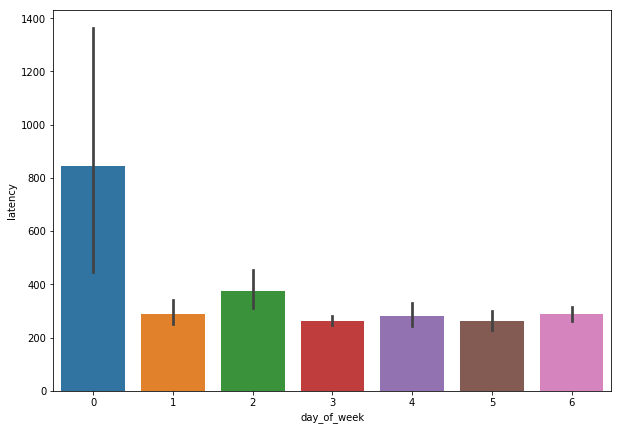

In [28]:
plt.figure(figsize=(10,7))
sns.barplot(data=vpn, x='day_of_week', y='latency')

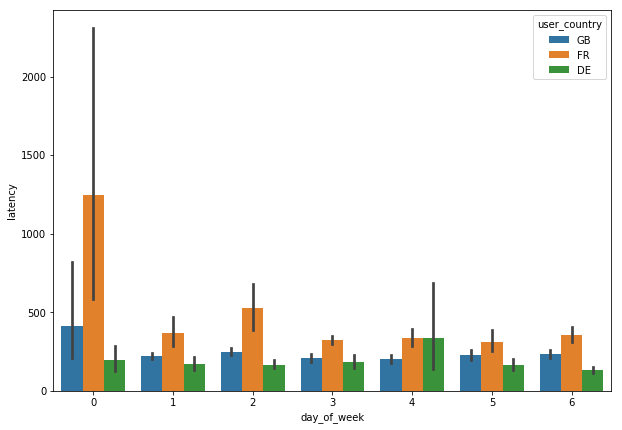

In [29]:
plt.figure(figsize=(10,7))
sns.barplot(data=vpn, x='day_of_week', y='latency', hue='user_country')

In [30]:
vpn.protocol.value_counts()

udp            43800
tcp             5658
l2tp            1111
sstp             143
pptp              11
ipsec_ikev2        5
cisco_ipsec        5
Name: protocol, dtype: int64

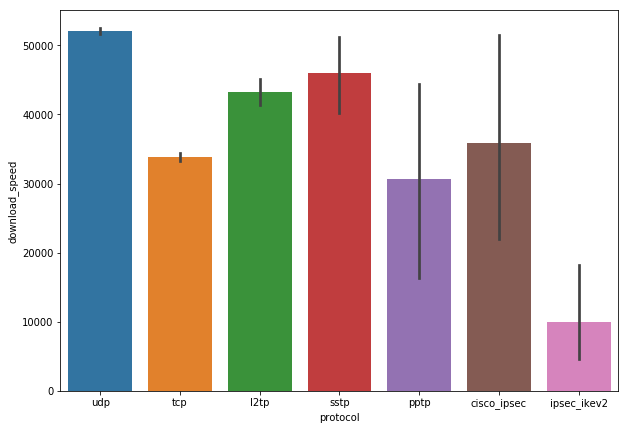

In [31]:
plt.figure(figsize=(10,7))
sns.barplot(data=vpn, x='protocol', y='download_speed')

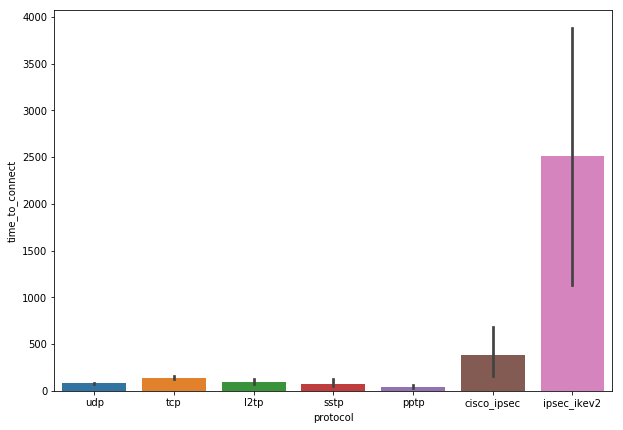

In [32]:
plt.figure(figsize=(10,7))
sns.barplot(data=vpn, x='protocol', y='time_to_connect')

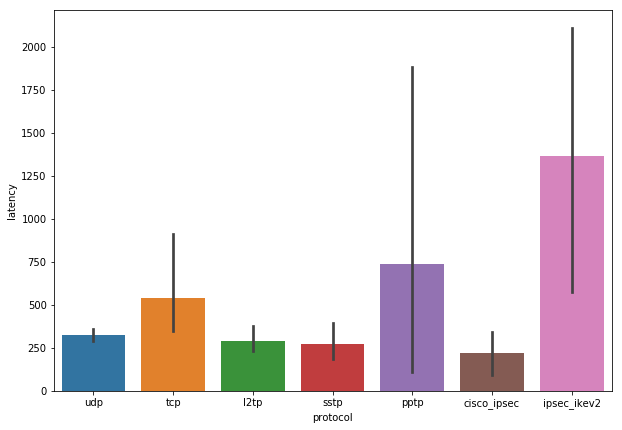

In [33]:
plt.figure(figsize=(10,7))
sns.barplot(data=vpn, x='protocol', y='latency')

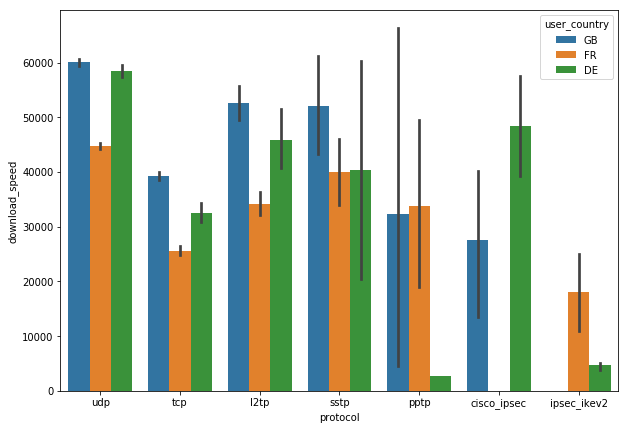

In [34]:
plt.figure(figsize=(10,7))
sns.barplot(data=vpn, x='protocol', y='download_speed', hue='user_country')

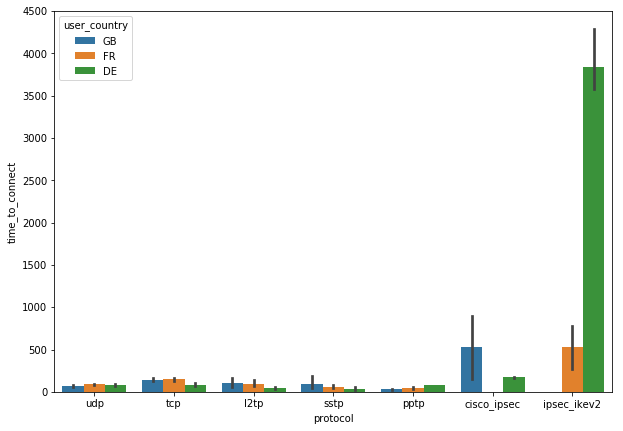

In [35]:
plt.figure(figsize=(10,7))
sns.barplot(data=vpn, x='protocol', y='time_to_connect', hue='user_country')

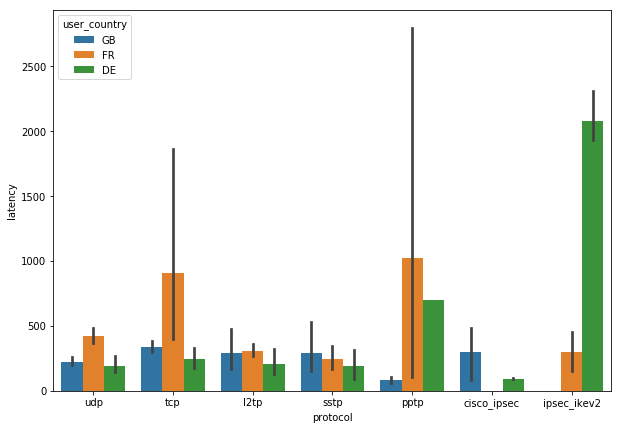

In [36]:
plt.figure(figsize=(10,7))
sns.barplot(data=vpn, x='protocol', y='latency', hue='user_country')

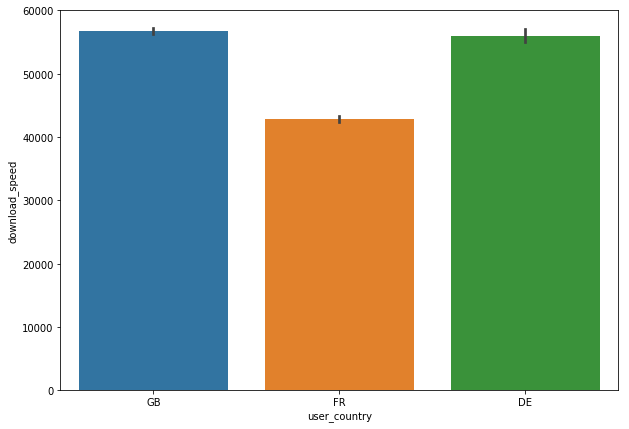

In [37]:
plt.figure(figsize=(10,7))
sns.barplot(data=vpn, x='user_country', y='download_speed')

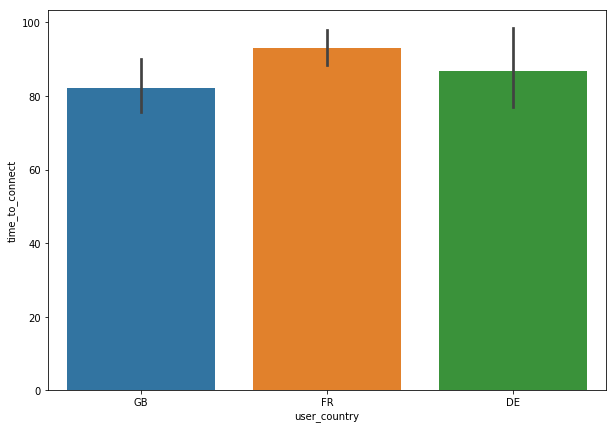

In [38]:
plt.figure(figsize=(10,7))
sns.barplot(data=vpn, x='user_country', y='time_to_connect')

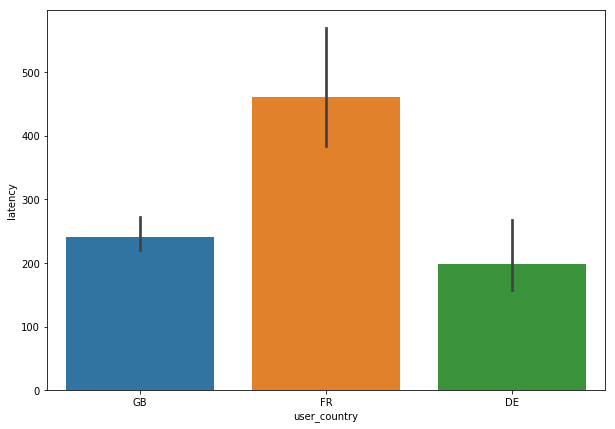

In [39]:
plt.figure(figsize=(10,7))
sns.barplot(data=vpn, x='user_country', y='latency')

Recommendations:
1. protocol ipsec_ikev2 (low download speed, high time-to-connect, high latency) performed very bad, so better be banished
2. network in France performed bad (high latency and relatively low download speed compared to the other countries), need to be improved

Comments:
1. Although data of ipsec_ikev2 shows this protocol performed bad, the amount of this protocol is small (only 5)
2. We can investigate the number of users, France got the highest users, that's why maybe because of no. of users is very high, the network there is bad 
3. 'banished' -- too strong wording😂, need to backed up with strong reasons
4. investigate reasons when there is strange findings

In [40]:
vpn.user_country.value_counts()

FR    25106
GB    21373
DE     4254
Name: user_country, dtype: int64

In [41]:
vpn.groupby('user_country').download_speed.sum()

user_country
DE    2.382309e+08
FR    1.076006e+09
GB    1.212120e+09
Name: download_speed, dtype: float64

In [42]:
vpn.groupby('user_country').download_speed.sum() / vpn.user_country.value_counts()
# in France, download speed per user is relatively lower than other countries

DE    56001.613302
FR    42858.539414
GB    56712.671375
dtype: float64

In [43]:
vpn.groupby('user_country').time_to_connect.sum() / vpn.user_country.value_counts()

DE    86.642689
FR    92.969410
GB    82.210920
dtype: float64

In [44]:
vpn.groupby('user_country').latency.sum() / vpn.user_country.value_counts()

DE    198.514575
FR    460.679678
GB    240.078230
dtype: float64

with the statistics of per user, France network performed relatively bad with lowest download speed, highest time-to-connect and highest latency. 